# Testing nbconvert template

In [1]:
import re
def fixLaTeXTag(text):
    """Function uses regular expressions to find latex in markdown sells and converts them to pressbook format"""
    pattern = re.compile(r'(?<!\\)[\$][\$]?[^\$]*(?<!\\)[\$|\$\$][\$]?')
    match = re.search(pattern,text)
    if(match):
        while(match):
            newtext = match.group(0)
            if newtext[1] == '$':
                newtext = '[latex]'+newtext[2:-2]+'[/latex]'
            else:
                newtext = '[latex]'+newtext[1:-1]+'[/latex]'
            text = text[:match.start()]+newtext+text[match.end():]
            match = re.search(pattern,text)
        return text
    else:
        return text

In [2]:
def ipynb2html(text):
    nb = nbformat.reads(text, as_version=4)
    
    ep = ExecutePreprocessor(timeout=600, kernel_name='python3', allow_errors=True)
    ep.preprocess(nb)
    
    # 2. Instantiate the exporter. We use the `basic` template for now; we'll get into more details
    # later about how to customize the exporter further.
    html_exporter = HTMLExporter()
    html_exporter.template_file = 'basic'

    # 3. Process the notebook we loaded earlier
    (body, resources) = html_exporter.from_notebook_node(nb)
    return (body, resources)


In [ ]:
def cleanhtml(text):
    
    for cell in nb.cells:
        if cell['cell_type'] == 'markdown':
            cell['source'] = fixLaTeXTag(cell['source'])
            
    # Remove weird paragraph marks
    body = body.replace(r'&#182;','')
    
    start=body
    tree = BeautifulSoup(body)
    body = tree.prettify()
    
    return text

In [3]:
from ebooklib import epub

book = epub.EpubBook()

ebookfilename = 'mth314.epub'
# set metadata
book.set_identifier('id123456')
book.set_title('Linear Algebra with Computational Applications')
book.set_language('en')

book.add_author('Dirk Colbry')
book.add_author('Ming Yan')

In [4]:
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
from pathlib import Path
from traitlets.config import Config
import os
from bs4 import BeautifulSoup

# 1. Import the exporter
from nbconvert import HTMLExporter

#infolder = 'CMSE401_Examples'
infolder = 'Examples'
#infolder = "MTH314_STUDENT"
outfolder = f'../{infolder}_html'

os.chdir(infolder)
p = Path('.')
outpath = Path(outfolder)

outpath.mkdir(exist_ok=True)
files = p.glob('*.ipynb')

files = sorted(files)
toc = []
for filename in files:
    print(filename)
    text = open(filename, 'r').read()

    (body, resources) = ipynb2html(text)
    body = cleanhtml(body)

    outfile = filename.stem+'.html'
    print(outfile)
    
    # create chapter
    c1 = epub.EpubHtml(title=filename.stem, file_name=outfile, lang='en')
    c1.content=body
    c1.properties.append('rendition:layout-pre-paginated rendition:orientation-landscape rendition:spread-none')

    book.add_item(c1)
    toc.append(c1)

    outfile = outfolder+'/'+filename.stem+'.html'
    print(outfile)
    with open(outfile, "w") as file:
        file.write(body)
os.chdir('..')

08--Robotics-pre-class-assignment-INSTRUCTOR.ipynb
08--Robotics-pre-class-assignment-INSTRUCTOR.html
../Examples_html/08--Robotics-pre-class-assignment-INSTRUCTOR.html
08--Robotics-pre-class-assignment.ipynb
08--Robotics-pre-class-assignment.html
../Examples_html/08--Robotics-pre-class-assignment.html


<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>In order to successfully complete this assignment, you must do the required reading, watch the provided videos, and complete all instructions. The embedded survey form must be entirely filled out and submitted on or before <strong><em>11:59pm on the day before class</em></strong>. Students must come to class the next day prepared to discuss the material covered in this assignment.</p>

</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 id="Pre-Class-Assignment:-Robotics-and-Reference-Frames">Pre-Class Assignment: Robotics and Reference Frames<a class="anchor-link" href="#Pre-Class-Assignment:-Robotics-and-Reference-Frames"></a></h1><p><img src="http
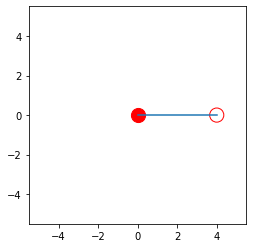
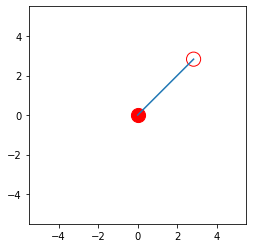
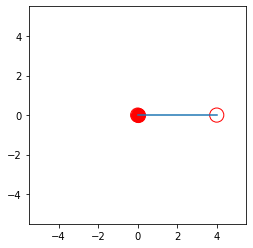
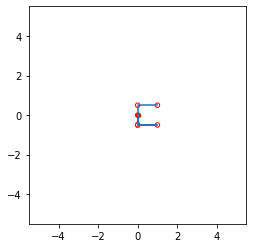
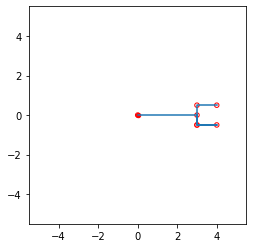
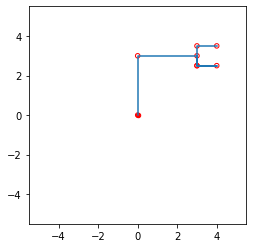
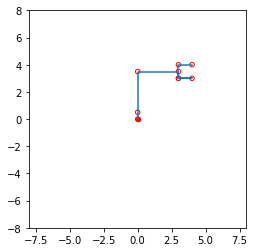
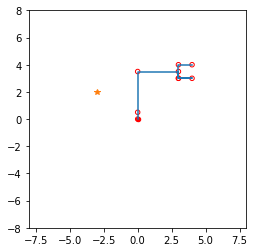
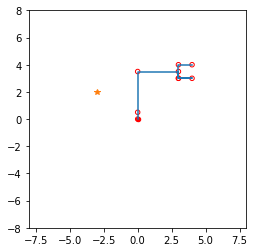

In [5]:
print(start)

In [ ]:
# define Table Of Contents
book.toc = tuple(toc)
    
# add default NCX and Nav file
book.add_item(epub.EpubNcx())
book.add_item(epub.EpubNav())
# book.set_cover(file_name = './Example/Jupiter_poll.jpg', content='test')
# define CSS style
style = 'BODY {color: white;}'
nav_css = epub.EpubItem(uid="style_nav", file_name="style/nav.css", media_type="text/css", content=style)

# add CSS file
#book.add_item(nav_css)

# basic spine
book.spine = ['nav']

# write to the file
epub.write_epub(ebookfilename, book, {})

In [ ]:
!open mth314.epub

[Go to openbooks sight at MSU](https://openbooks.lib.msu.edu)

In [ ]:
# print(filename)
# text = open(filename, 'r').read()

# nb = nbformat.reads(text, as_version=4)

# ep = ExecutePreprocessor(timeout=600, kernel_name='python3')
# ep.preprocess(nb)

# for cell in nb.cells:
#     if cell['cell_type'] == 'markdown':
#         cell['source'] = fixLaTeXTag(cell['source'])
#     elif cell['cell_type'] == 'code':
#         for out in cell['outputs']:
#             if 'data' in out:
#                 print(out['data']['text/plain'])
#                 if 'YouTubeVideo' in out['data']['text/plain']:
#                     out['data']['text/plain'] = 'IPython.core.display.HTML object>'

In [ ]:
# # 2. Instantiate the exporter. We use the `basic` template for now; we'll get into more details
# # later about how to customize the exporter further.
# html_exporter = HTMLExporter()
# html_exporter.template_file = 'basic'

# # 3. Process the notebook we loaded earlier
# (body, resources) = html_exporter.from_notebook_node(nb)

# outfile = 'test.html'
# print(outfile)
# with open(outfile, "w") as file:
#     file.write(body)